<a href="https://colab.research.google.com/github/VannySothea/Diabetes_Prediction/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/diabetes.csv");

**Pregnancies** - Number of times pregnant

**Glucose** - Plasma glucose concentration a 2 hours in an oral glucose tolerance test

**BloodPressure** - Diastolic blood pressure (mm Hg)

**SkinThickness** - Triceps skin fold thickness (mm)

**Insulin** - 2-Hour serum insulin (mu U/ml)

**BMI** - Body mass index (weight in kg/(height in m)^2)

**DiabetesPedigreeFunction** - Diabetes pedigree function

**Age** - Age (years)

**Outcome** - Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df.shape

(768, 9)

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.nunique()

,0
Pregnancies,17
Glucose,136
BloodPressure,47
SkinThickness,51
Insulin,186
BMI,248
DiabetesPedigreeFunction,517
Age,52
Outcome,2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


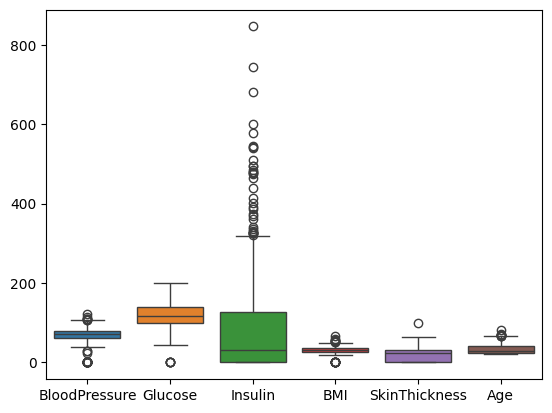

In [10]:
sns.boxplot(data=df[['BloodPressure', 'Glucose', 'Insulin', 'BMI', 'SkinThickness', 'Age']])

plt.show()

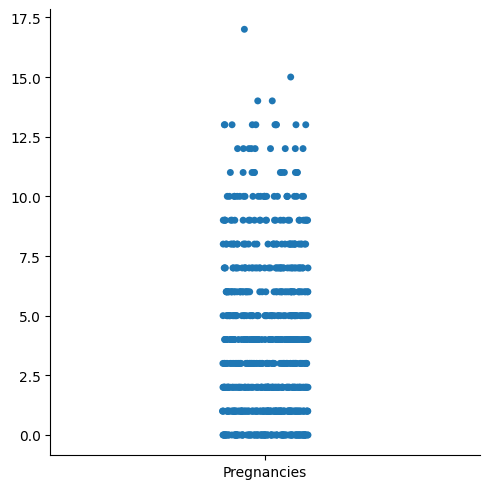

In [11]:
sns.catplot(data=df[['Pregnancies']])

plt.show()

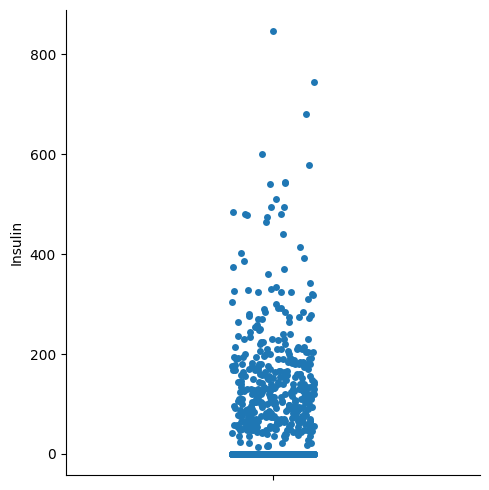

In [12]:
sns.catplot(data=df['Insulin'])

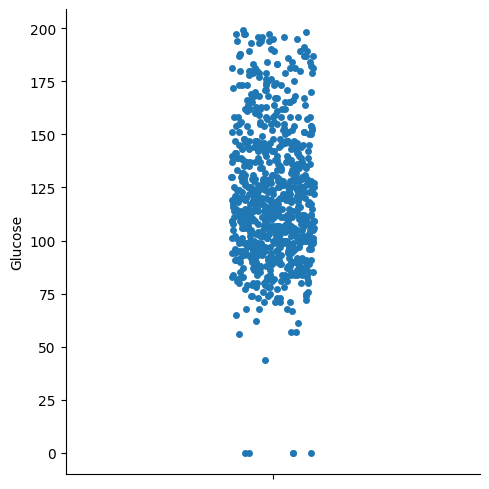

In [13]:
sns.catplot(data=df['Glucose'])

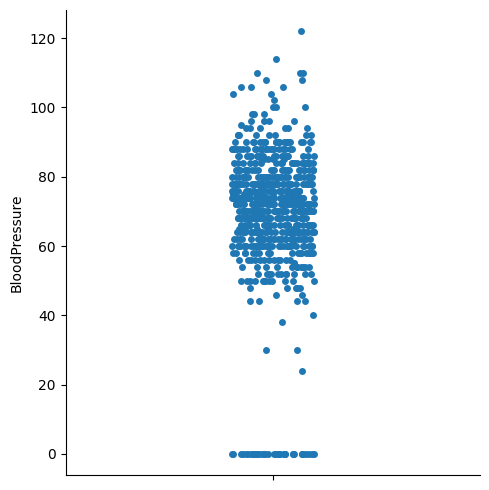

In [14]:
sns.catplot(data=df['BloodPressure'])

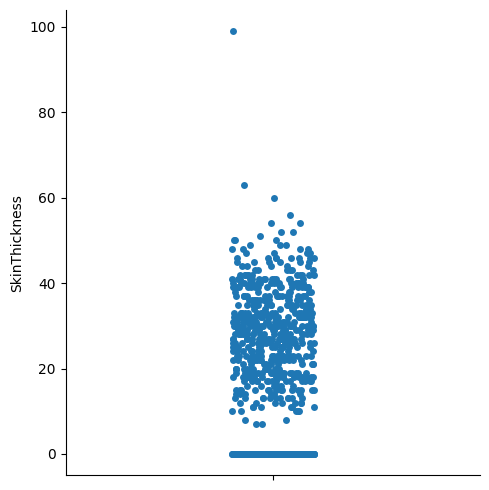

In [15]:
sns.catplot(data=df['SkinThickness'])

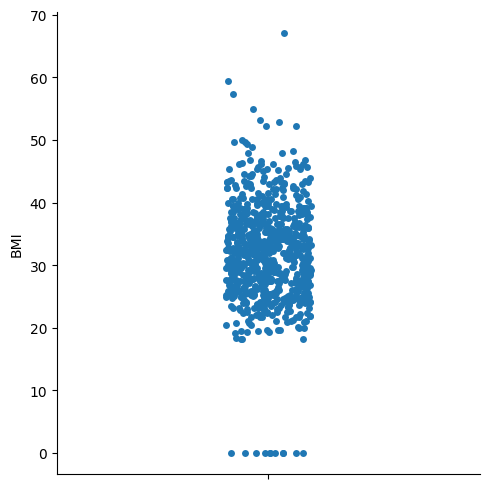

In [16]:
sns.catplot(data=df['BMI'])

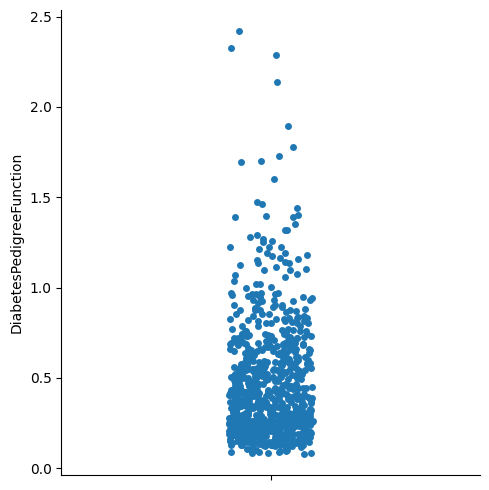

In [17]:
sns.catplot(data=df['DiabetesPedigreeFunction'])

In [19]:
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in zero_cols:
  num_zeros = (df[col] == 0).sum()
  print(f'{col} has {num_zeros} zero(s)')

Glucose has 5 zero(s)
BloodPressure has 35 zero(s)
SkinThickness has 227 zero(s)
Insulin has 374 zero(s)
BMI has 11 zero(s)


**Glucose Outlier in Pima**

In the Pima Indians Diabetes dataset, outliers for the Glucose feature are identified as data points that lie beyond 3 standard deviations from the mean for normally skewed features. Since Glucose is a right-skewed feature, outliers are those data points that are greater than (µ + 2.5σ).

The research paper "Skewness based Outlier Elimination Algorithm for Pima Diabetes Dataset" suggests an algorithm that eliminates outliers based on the skewness of the features. For right-skewed features like Glucose, the algorithm removes data points that are greater than (µ + 2.5σ).

This approach helps in improving the accuracy of machine learning models by reducing the impact of extreme values that could distort the results.

**Glucose Normal Range**

The normal range for blood glucose levels varies depending on the time of measurement and whether a person has diabetes or not. For someone without diabetes, a normal fasting blood glucose level is typically between 70 to 99 mg/dL (3.9 to 5.5 mmol/L).
 After meals, a normal blood glucose level should be less than 140 mg/dL (7.8 mmol/L).
 For individuals with diabetes, the target range is generally 80 to 130 mg/dL before meals and less than 180 mg/dL one to two hours after meals.

In [20]:
df['Glucose_missing_flag'] = np.where(df['Glucose'] == 0, 1, 0)
non_zero_glucose = df.loc[df['Glucose'] != 0, 'Glucose']
median_glucose = non_zero_glucose.median()
print(f'median_glucose {median_glucose}')

df.loc[df['Glucose'] == 0, 'Glucose'] = median_glucose

median_glucose 117.0


**Blood Pressure Normal Range**

Normal blood pressure is defined as less than 120/80 mm Hg.
 Elevated blood pressure, which is a stage before hypertension, is characterized by a systolic pressure ranging from 120 to 129 mm Hg and a diastolic pressure below 80 mm Hg.
 Hypertension Stage 1 begins at a systolic pressure of 130 to 139 mm Hg or a diastolic pressure of 80 to 89 mm Hg.
 Hypertension Stage 2 is diagnosed when the systolic pressure is 140 mm Hg or higher or the diastolic pressure is 90 mm Hg or higher.
 A hypertensive crisis occurs at blood pressure readings higher than 180/120 mm Hg, requiring immediate medical attention.

In [21]:
df['BloodPressure_missing_flag'] = np.where(df['BloodPressure'] == 0, 1, 0)
non_zero_bloodpressure = df.loc[df['BloodPressure'] != 0, 'BloodPressure']
median_bloodpressure = non_zero_bloodpressure.median()
print(f'median_bloodpressure {median_bloodpressure}')

df.loc[df['BloodPressure'] == 0, 'BloodPressure'] = median_bloodpressure

median_bloodpressure 72.0


In [22]:
bloodpressure_valid = df[df['BloodPressure_missing_flag'] == 0]['BloodPressure']
threshold_bloodpressure = bloodpressure_valid.quantile(0.99)
print("99th percentile threshold:", threshold_bloodpressure)

outliers = bloodpressure_valid[bloodpressure_valid > threshold_bloodpressure]
print('Number of BloodPressure outliers:', len(outliers))

99th percentile threshold: 106.0
Number of BloodPressure outliers: 7


In [23]:
df.loc[(df['BloodPressure'] > threshold_bloodpressure) & (df['BloodPressure_missing_flag'] == 0), 'BloodPressure_missing_flag'] = 1

df.loc[(df['BloodPressure'] > threshold_bloodpressure) & (df['BloodPressure_missing_flag'] == 1), 'BloodPressure'] = int(threshold_bloodpressure)

df.loc[(df['BloodPressure'] < 40) & (df['BloodPressure_missing_flag'] == 0), 'BloodPressure_missing_flag'] = 1

df.loc[(df['BloodPressure'] < 40) & (df['BloodPressure_missing_flag'] == 1), 'BloodPressure'] = 40

In [24]:
df['SkinThickness_missing_flag'] = np.where(df['SkinThickness'] == 0, 1, 0)
non_zero_skinThickness = df.loc[df['SkinThickness'] != 0, 'SkinThickness']
median_skinThickness = non_zero_skinThickness.median()
print(f'median_skinThickness {median_skinThickness}')

df.loc[df['SkinThickness'] == 0, 'SkinThickness'] = median_skinThickness

median_skinThickness 29.0


In [25]:
skinThickness_valid = df[df['SkinThickness_missing_flag'] == 0]['SkinThickness']
mean_skinThickness = skinThickness_valid.mean()
std_skinThickness = skinThickness_valid.std()
threshold_skinThickness = mean_skinThickness + 2.5 * std_skinThickness

print('threshold:', threshold_skinThickness)

threshold: 55.34587551831369


In [26]:
df.loc[(df['SkinThickness'] > threshold_skinThickness) & (df['SkinThickness_missing_flag'] == 0), 'SkinThickness_missing_flag'] = 1

df.loc[(df['SkinThickness'] > threshold_skinThickness) & (df['SkinThickness_missing_flag'] == 1), 'SkinThickness'] = int(median_skinThickness)

**Insulin Outlier in Pima**

In the Pima Indians diabetes dataset, the insulin levels have numerous outliers. These outliers are typically represented by values that are significantly higher or lower than the rest of the data points and can affect the analysis. In the context provided, the insulin box plot has numerous outliers, and these 0 values, which are not possible for a living human organism, are treated as missing values and replaced with the median for more accurate results.

The exact threshold or value that defines an outlier for insulin in this dataset is not explicitly provided in the context. However, the presence of many outliers suggests that the distribution of insulin levels is likely skewed, and the median is used to replace the 0 values to mitigate the impact of these outliers on the analysis.

Median=
Number of Non-Zero Insulin Levels
∑Insulin Levels
​


This equation represents a simplified way to calculate the median insulin level, which is used to replace the 0 values in the dataset.


The normal range for fasting insulin levels is typically between 2-25 mU/L, though it can vary slightly depending on the laboratory.
 According to a study on healthy Iranian adults, the reference values for fasting serum insulin are 2-12 μU/mL for both genders.
 Functional medicine practitioners recommend keeping fasting insulin between 2-5 μU/mL for optimal health, as higher levels can be associated with insulin resistance and weight management challenges.

In practice, insulin values >300 µU/mL are rare even in pathological conditions.

Using domain knowledge (e.g., "anything above 300–350 is suspicious") often leads to cleaner, more reliable datasets.

In [27]:
df['Insulin_missing_flag'] = np.where(df['Insulin'] == 0, 1, 0)
non_zero_insulin = df.loc[df['Insulin'] != 0, 'Insulin']
median_insulin = non_zero_insulin.median()
print(f'median_insulin {median_insulin}')

df.loc[df['Insulin'] == 0, 'Insulin'] = median_insulin

median_insulin 125.0


In [28]:
insulin_valid = df[df['Insulin_missing_flag'] == 0]['Insulin']
threshold_insulin = insulin_valid.quantile(0.93)
print("93th percentile threshold:", threshold_insulin)

outliers = insulin_valid[insulin_valid > threshold_insulin]
print('Number of insulin outliers:', len(outliers))

93th percentile threshold: 328.98
Number of insulin outliers: 28


In [29]:
df.loc[(df['Insulin'] > threshold_insulin) & (df['Insulin_missing_flag'] == 0), 'Insulin_missing_flag'] = 1

df.loc[(df['Insulin'] > threshold_insulin) & (df['Insulin_missing_flag'] == 1), 'Insulin'] = int(threshold_insulin)

In [30]:
df['BMI_missing_flag'] = np.where(df['BMI'] == 0, 1, 0)
non_zero_BMI = df.loc[df['BMI'] != 0, 'BMI']
median_BMI = non_zero_BMI.median()
print(f'median_BMI {median_BMI}')

df.loc[df['BMI'] == 0, 'BMI'] = median_BMI

median_BMI 32.3


In [31]:
BMI_valid = df[df['BMI_missing_flag'] == 0]['BMI']
threshold_BMI = BMI_valid.quantile(0.99)
print("99th percentile threshold:", threshold_BMI)

outliers = BMI_valid[BMI_valid > threshold_BMI]
print('Number of insulin outliers:', len(outliers))

99th percentile threshold: 51.011999999999865
Number of insulin outliers: 8


In [32]:
df.loc[(df['BMI'] > threshold_BMI) & (df['BMI_missing_flag'] == 0), 'BMI_missing_flag'] = 1

df.loc[(df['BMI'] > threshold_BMI) & (df['BMI_missing_flag'] == 1), 'BMI'] = int(median_BMI)

Q1 (25th percentile) ≈ 0.244

Q3 (75th percentile) ≈ 0.626

IQR = Q3 - Q1 = 0.626 - 0.244 = 0.382

### **IQR Method for Outliers:**

**Upper bound (outlier threshold) = Q3 + 1.5 × IQR**

0.626 + (1.5 × 0.382) ≈ 1.199 → Rounded ≈ 1.2

**Lower bound = Q1 − 1.5 × IQR**

But not needed here, since the min value (0.078) is within range.

In [33]:
df['DPF_missing_flag'] = np.where(df['DiabetesPedigreeFunction'] > 1.2, 1, 0)
df['DiabetesPedigreeFunction'] = np.where(df['DiabetesPedigreeFunction'] > 1.2, 1.2, df['DiabetesPedigreeFunction'])

In [37]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_missing_flag,BloodPressure_missing_flag,SkinThickness_missing_flag,Insulin_missing_flag,BMI_missing_flag,DPF_missing_flag
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.384115,28.897135,134.938802,32.203255,0.458914,33.240885,0.348958,0.006510,0.059896,0.300781,0.523438,0.024740,0.037760
std,3.369578,30.438286,11.769610,8.196803,61.988371,6.410524,0.285596,11.760232,0.476951,0.080476,0.237448,0.458897,0.499776,0.155432,0.190741
min,0.000000,44.000000,40.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.150000,0.372500,29.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.300000,0.626250,41.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,17.000000,199.000000,106.000000,54.000000,328.000000,50.000000,1.200000,81.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
from google.colab import files

In [39]:
df.to_csv('diabetes_cleaned.csv', index=False)
files.download('diabetes_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

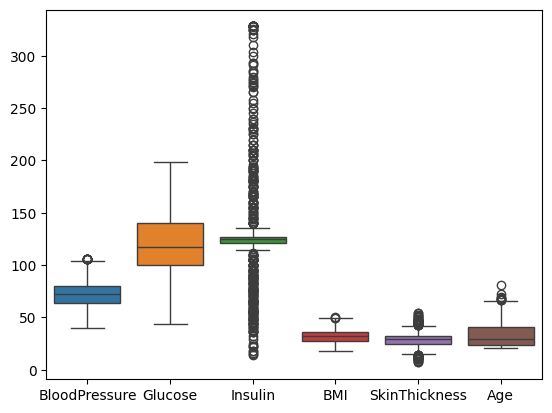

In [52]:
sns.boxplot(data=df[['BloodPressure', 'Glucose', 'Insulin', 'BMI', 'SkinThickness', 'Age']])
plt.show()

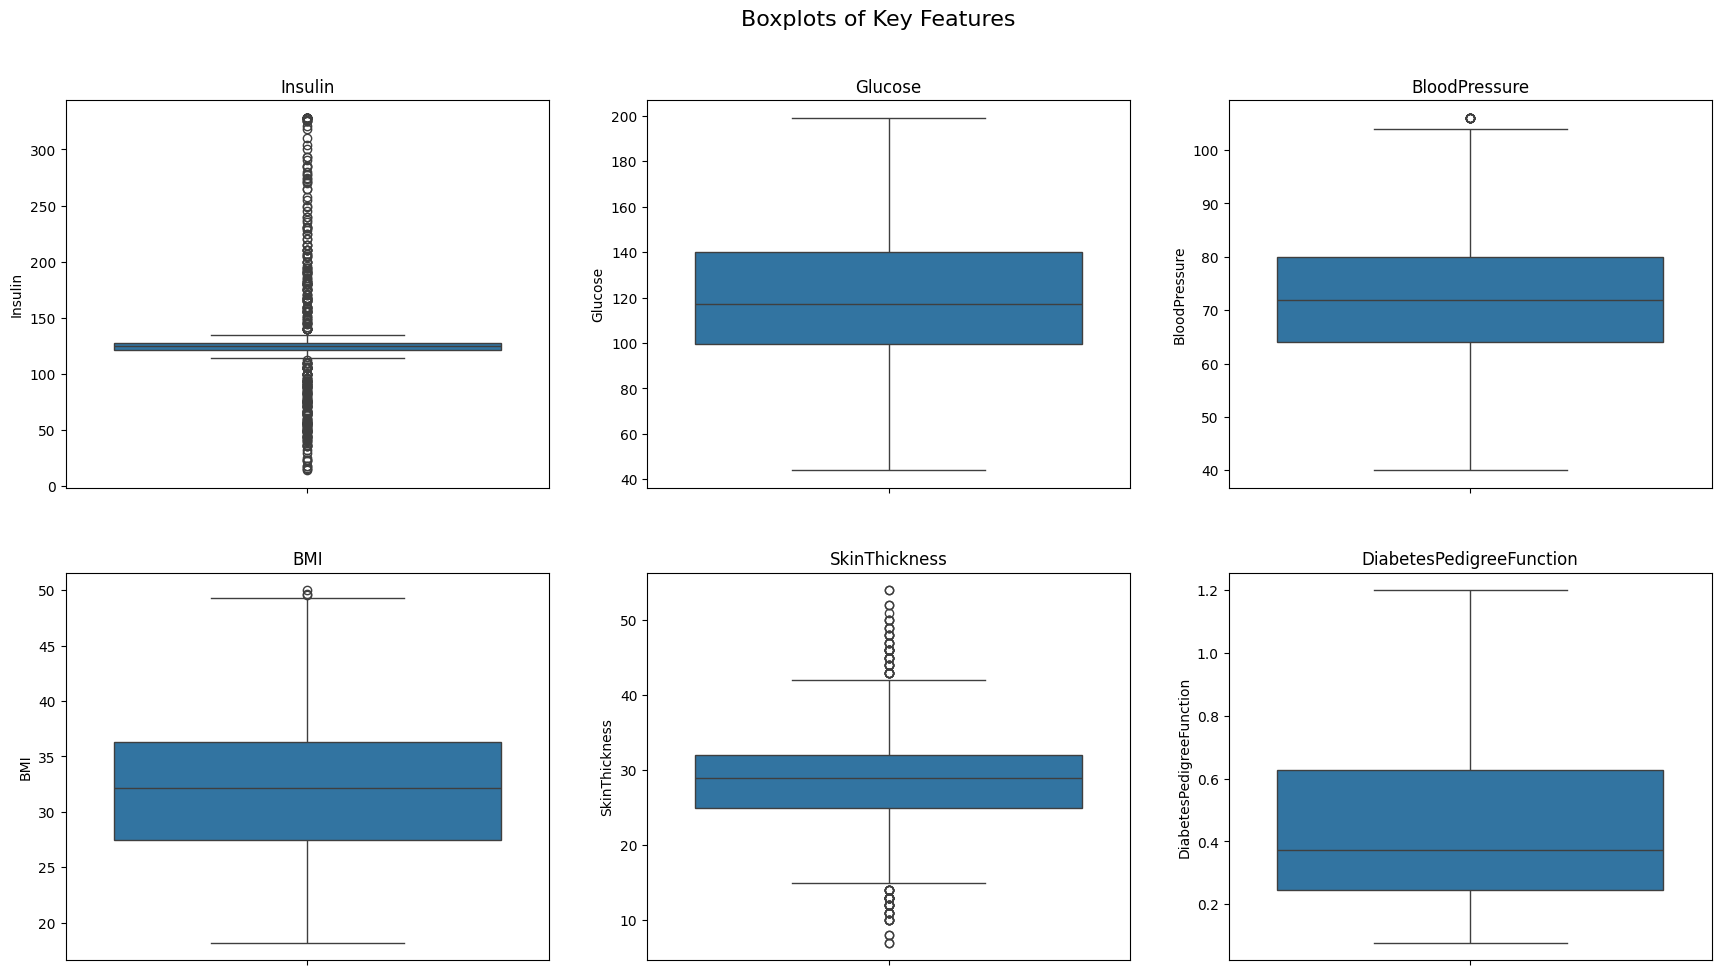

In [50]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
plt.tight_layout(pad=4.0)

# Data columns to plot
columns = ['Insulin', 'Glucose', 'BloodPressure', 'BMI', 'SkinThickness', 'DiabetesPedigreeFunction']

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop through each column and plot with seaborn
for i, col in enumerate(columns):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

plt.suptitle('Boxplots of Key Features', fontsize=16, y=1.03)
plt.show()

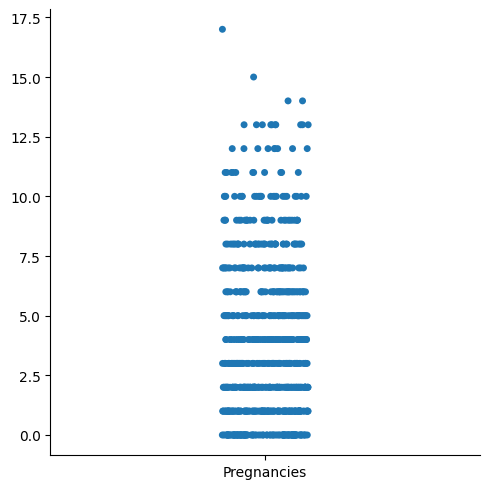

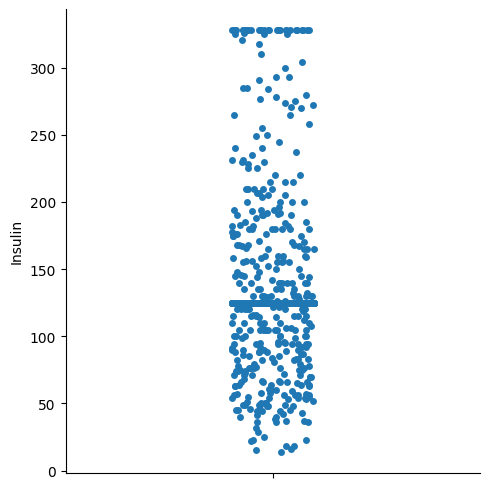

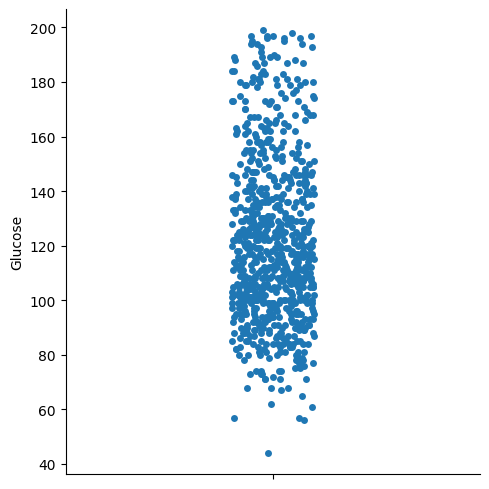

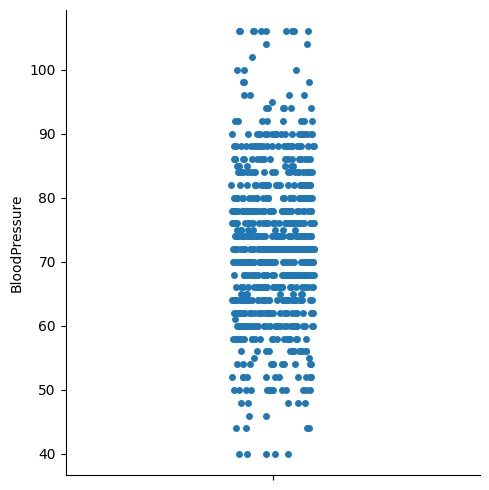

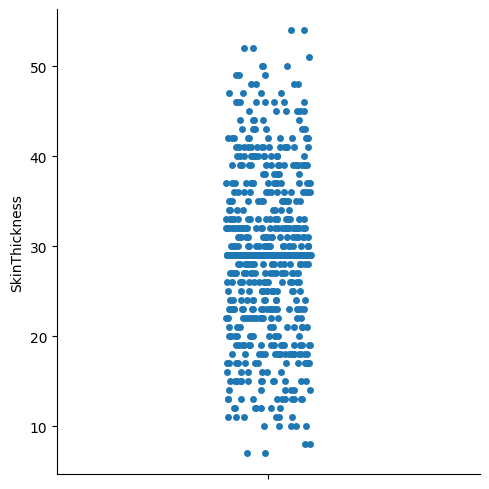

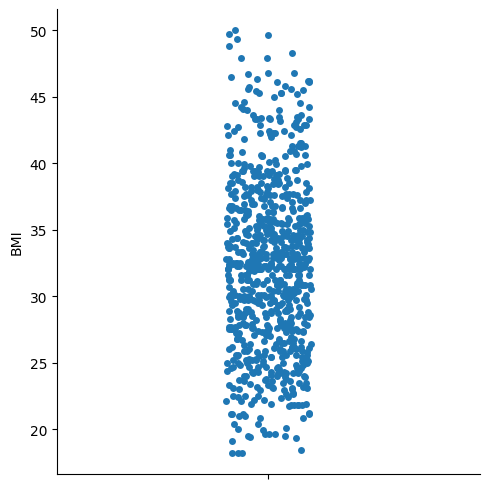

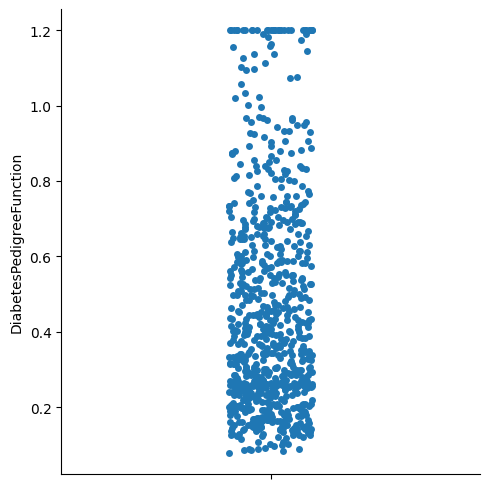

In [53]:
sns.catplot(data=df[['Pregnancies']])
sns.catplot(data=df['Insulin'])
sns.catplot(data=df['Glucose'])
sns.catplot(data=df['BloodPressure'])
sns.catplot(data=df['SkinThickness'])
sns.catplot(data=df['BMI'])
sns.catplot(data=df['DiabetesPedigreeFunction'])

plt.show()